# Make Star Formation and Metal Enrichment History (SFZH)

Synthesizer contains a number of methods for creating simple parametric forms of the star formatin and metal enrichment history.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from unyt import yr, Myr

from synthesizer.parametric.sfzh import SFH, ZH, generate_sfzh, generate_sfzh_from_array

First we define an age and metallicity grid. In practice these are often pulled from the grid object.

In [2]:
log10ages = np.arange(6., 10.5, 0.1)
log10metallicities = np.arange(-5., -1.5, 0.25)
metallicities = 10**log10metallicities

`generate_sfzh_from_array` then takes these arrays to define the grid, as well as the value on this grid. In this simple example we define a constant star formation history (SFH), and a fixed metallicity. The SFH is defined as an array, and the metallicity as a single float.

----------
SUMMARY OF BINNED SFZH
median age: 158.49 Myr
mean age: 2713.93 Myr
mean metallicity: 0.0100
----------



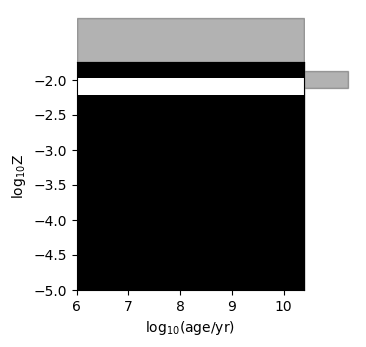

(45, 14)


In [3]:
sfh = np.ones(len(log10ages))
Z = 0.01
sfzh = generate_sfzh_from_array(log10ages, metallicities, sfh, Z)
print(sfzh)

sfzh.plot()
print(sfzh.sfzh.shape)

Synthesizer also provides some simple classes encapsulating common parametrisations. For example, the metallicity can be defined as a delta function. Once instantiated these objects then have additional methods.

In [4]:
Z_p = {'log10Z': -2.5}  # can also use linear metallicity e.g. {'Z': 0.01}
Zh = ZH.deltaConstant(Z_p)
print(Zh)  # print summary

----------
SUMMARY OF PARAMETERISED METAL ENRICHMENT HISTORY
<class 'synthesizer.parametric.sfzh.ZH.deltaConstant'>
log10Z: -2.5
----------



We can also make a constant SFH.

In [5]:
sfh_p = {'duration': 100 * Myr}
sfh = SFH.Constant(sfh_p)  # constant star formation
print(sfh)  # print summary

----------
SUMMARY OF PARAMETERISED STAR FORMATION HISTORY
<class 'synthesizer.parametric.sfzh.SFH.Constant'>
duration: 100 Myr
median age: 50.00 Myr
mean age: 50.00 Myr
----------



Combining these together, we can create the same 2D SFZH as previously

----------
SUMMARY OF BINNED SFZH
median age: 50.12 Myr
mean age: 50.01 Myr
mean metallicity: 0.0032
----------



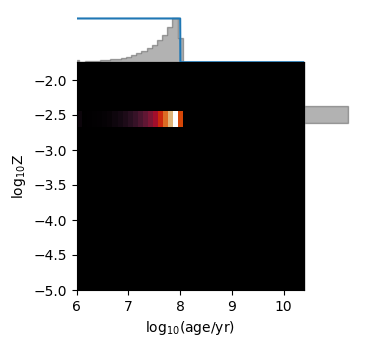

(<Figure size 350x350 with 3 Axes>,
 <Axes: xlabel='$\\rm log_{10}(age/yr)$', ylabel='$\\rm log_{10}Z$'>)

In [6]:
constant = generate_sfzh(log10ages, metallicities, sfh, Zh)
print(constant)  # print summary of the star formation history
constant.plot()

Make an exponential SFH

----------
SUMMARY OF PARAMETERISED STAR FORMATION HISTORY
<class 'synthesizer.parametric.sfzh.SFH.TruncatedExponential'>
tau: 100 Myr
max_age: 200 Myr
median age: 56.00 Myr
mean age: 68.20 Myr
----------

----------
SUMMARY OF BINNED SFZH
median age: 63.10 Myr
mean age: 68.54 Myr
mean metallicity: 0.0032
----------



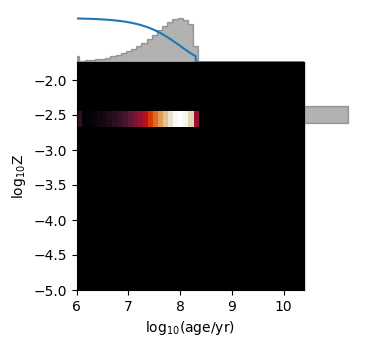

(<Figure size 350x350 with 3 Axes>,
 <Axes: xlabel='$\\rm log_{10}(age/yr)$', ylabel='$\\rm log_{10}Z$'>)

In [7]:
sfh_p = {'tau': 100 * Myr, 'max_age': 200 * Myr}
sfh = SFH.TruncatedExponential(sfh_p)  # constant star formation
print(sfh)  # print summary of the star formation history

exponential = generate_sfzh(log10ages, metallicities, sfh, Zh)
print(exponential)  # print summary of the star formation history
exponential.plot()

Add them together

----------
SUMMARY OF BINNED SFZH
median age: 50.12 Myr
mean age: 59.27 Myr
mean metallicity: 0.0032
----------



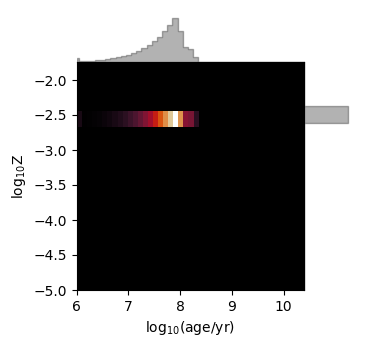

(<Figure size 350x350 with 3 Axes>,
 <Axes: xlabel='$\\rm log_{10}(age/yr)$', ylabel='$\\rm log_{10}Z$'>)

In [8]:
combined = constant + exponential
print(combined)  # print summary of the star formation history
combined.plot()